In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
path20="/content/drive/My Drive/bitsproj/HINDUNILVR.NS.csv"
path19="/content/drive/My Drive/bitsproj/HINDUNILVR.NS19.csv"

In [3]:
df20 = pd.read_csv(path20)
df19 = pd.read_csv(path19)

In [4]:
df20.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,2000.000000,2039.199951,1933.900024,1941.900024,1920.525024,2948679
1,2020-03-17,1955.550049,2088.000000,1951.949951,2004.050049,1981.990967,3732382
2,2020-03-18,2034.050049,2063.800049,1909.349976,1923.800049,1902.624268,3910994
3,2020-03-19,1894.300049,1899.000000,1757.300049,1838.300049,1818.065430,5095006
4,2020-03-20,1850.000000,2078.899902,1850.000000,2051.699951,2029.116333,4252245


In [5]:
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-15,1745.000000,1746.500000,1694.449951,1698.400024,1659.029297,3571762
1,2019-03-18,1710.000000,1710.949951,1686.900024,1697.550049,1658.199097,1621113
2,2019-03-19,1697.599976,1709.400024,1688.199951,1699.650024,1660.250366,1456211
3,2019-03-20,1705.000000,1716.500000,1683.449951,1687.550049,1648.430908,2312268
4,2019-03-22,1687.550049,1703.849976,1673.699951,1678.050049,1639.151245,1636228


In [6]:
df20.shape

(146, 7)

In [7]:
df19['newda'] = [df19['Date'][i][5:] for i in range(139)]
df20['newda'] = [df20['Date'][i][5:] for i in range(146)]
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume,newda
0,2019-03-15,1745.000000,1746.500000,1694.449951,1698.400024,1659.029297,3571762,03-15
1,2019-03-18,1710.000000,1710.949951,1686.900024,1697.550049,1658.199097,1621113,03-18
2,2019-03-19,1697.599976,1709.400024,1688.199951,1699.650024,1660.250366,1456211,03-19
3,2019-03-20,1705.000000,1716.500000,1683.449951,1687.550049,1648.430908,2312268,03-20
4,2019-03-22,1687.550049,1703.849976,1673.699951,1678.050049,1639.151245,1636228,03-22


In [8]:
df_in = pd.merge(df19,df20,on='newda',how='inner')
df_in.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,newda,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2019-03-18,1710.000000,1710.949951,1686.900024,1697.550049,1658.199097,1621113,03-18,2020-03-18,2034.050049,2063.800049,1909.349976,1923.800049,1902.624268,3910994
1,2019-03-19,1697.599976,1709.400024,1688.199951,1699.650024,1660.250366,1456211,03-19,2020-03-19,1894.300049,1899.000000,1757.300049,1838.300049,1818.065430,5095006
2,2019-03-20,1705.000000,1716.500000,1683.449951,1687.550049,1648.430908,2312268,03-20,2020-03-20,1850.000000,2078.899902,1850.000000,2051.699951,2029.116333,4252245
3,2019-03-25,1674.000000,1687.500000,1660.000000,1673.849976,1635.048462,2039945,03-25,2020-03-25,2010.050049,2138.949951,2001.650024,2088.149902,2065.165039,3959038
4,2019-03-26,1679.900024,1691.550049,1674.000000,1683.800049,1644.767822,1452899,03-26,2020-03-26,2089.000000,2250.000000,2060.000000,2194.899902,2170.739990,3201540


In [9]:
ndf19=pd.DataFrame(df_in,columns=['Date_x','Open_x','High_x',	'Low_x','Close_x','Adj Close_x','Volume_x'])
ndf19.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x
0,2019-03-18,1710.000000,1710.949951,1686.900024,1697.550049,1658.199097,1621113
1,2019-03-19,1697.599976,1709.400024,1688.199951,1699.650024,1660.250366,1456211
2,2019-03-20,1705.000000,1716.500000,1683.449951,1687.550049,1648.430908,2312268
3,2019-03-25,1674.000000,1687.500000,1660.000000,1673.849976,1635.048462,2039945
4,2019-03-26,1679.900024,1691.550049,1674.000000,1683.800049,1644.767822,1452899


In [10]:
ndf20=pd.DataFrame(df_in,columns=['Date_y','Open_y','High_y',	'Low_y','Close_y','Adj Close_y','Volume_y'])
ndf20.head()

,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2020-03-18,2034.050049,2063.800049,1909.349976,1923.800049,1902.624268,3910994
1,2020-03-19,1894.300049,1899.000000,1757.300049,1838.300049,1818.065430,5095006
2,2020-03-20,1850.000000,2078.899902,1850.000000,2051.699951,2029.116333,4252245
3,2020-03-25,2010.050049,2138.949951,2001.650024,2088.149902,2065.165039,3959038
4,2020-03-26,2089.000000,2250.000000,2060.000000,2194.899902,2170.739990,3201540


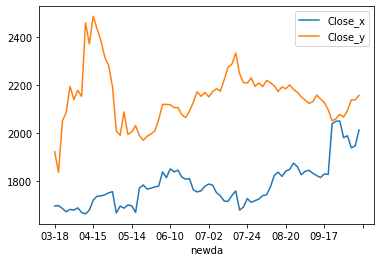

In [11]:
df_in.plot(x='newda',y=["Close_x","Close_y"])


In [12]:
daily_close19 = df_in[["Adj Close_x"]]
daily_log_returns19 = np.log(daily_close19.pct_change()+1)
daily_log_returns19.fillna(0, inplace=True)
print(daily_log_returns19)
daily_close20 = df_in[["Adj Close_y"]]
daily_log_returns20 = np.log(daily_close20.pct_change()+1)
daily_log_returns20.fillna(0, inplace=True)
print(daily_log_returns20)

    Adj Close_x
0      0.000000
1      0.001236
2     -0.007145
3     -0.008151
4      0.005927
..          ...
75    -0.034490
76     0.004204
77    -0.025572
78     0.004089
79     0.033444

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1     -0.045461
2      0.109827
3      0.017610
4      0.049858
..          ...
75    -0.005208
76     0.012851
77     0.020949
78     0.000140
79     0.008609

[80 rows x 1 columns]


In [13]:
daily_pct_change19 = daily_close19 / daily_close19.shift(1) - 1
daily_pct_change19.fillna(0, inplace=True)
print(daily_pct_change19)
daily_pct_change20 = daily_close20 / daily_close20.shift(1) - 1
daily_pct_change20.fillna(0, inplace=True)
print(daily_pct_change20)

    Adj Close_x
0      0.000000
1      0.001237
2     -0.007119
3     -0.008118
4      0.005944
..          ...
75    -0.033902
76     0.004213
77    -0.025248
78     0.004098
79     0.034009

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1     -0.044443
2      0.116085
3      0.017766
4      0.051122
..          ...
75    -0.005195
76     0.012934
77     0.021169
78     0.000140
79     0.008646

[80 rows x 1 columns]


In [14]:
daily_pct_changen19 = daily_pct_change19.to_numpy()
daily_pct_changen20 = daily_pct_change20.to_numpy()

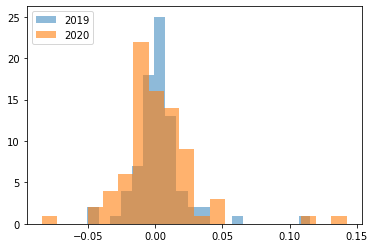

In [15]:
plt.hist(daily_pct_changen19,bins=20,label='2019',alpha=0.5)
plt.hist(daily_pct_changen20,bins=20,label='2020',alpha=0.6)
plt.legend(loc='upper left')
plt.show()

In [16]:
print(daily_pct_change19.describe())

       Adj Close_x
count    80.000000
mean      0.002427
std       0.020231
min      -0.050521
25%      -0.006811
50%       0.002362
75%       0.007846
max       0.115105


In [17]:
print(daily_pct_change20.describe())

       Adj Close_y
count    80.000000
mean      0.001988
std       0.029354
min      -0.084191
25%      -0.009277
50%      -0.000236
75%       0.010601
max       0.142403


In [18]:
cum_daily_return19 = (1 + daily_pct_change19).cumprod()
print(cum_daily_return19)

    Adj Close_x
0      1.000000
1      1.001237
2      0.994109
3      0.986039
4      0.991900
..          ...
75     1.175974
76     1.180928
77     1.151113
78     1.155830
79     1.195139

[80 rows x 1 columns]


In [19]:
cum_daily_return20 = (1 + daily_pct_change20).cumprod()
print(cum_daily_return20)

    Adj Close_y
0      1.000000
1      0.955557
2      1.066483
3      1.085430
4      1.140919
..          ...
75     1.087051
76     1.101111
77     1.124421
78     1.124578
79     1.134302

[80 rows x 1 columns]


In [20]:
dta = [df_in['newda'],cum_daily_return19,cum_daily_return20]
exdf = pd.concat(dta,axis=1)
exdf = exdf.rename(columns={'newda':"Date",'Adj Close_x':'2019','Adj Close_y':'2020'})
exdf

,Date,2019,2020
0,03-18,1.000000,1.000000
1,03-19,1.001237,0.955557
2,03-20,0.994109,1.066483
3,03-25,0.986039,1.085430
4,03-26,0.991900,1.140919
...,...,...,...
75,09-30,1.175974,1.087051
76,10-01,1.180928,1.101111
77,10-07,1.151113,1.124421
78,10-09,1.155830,1.124578


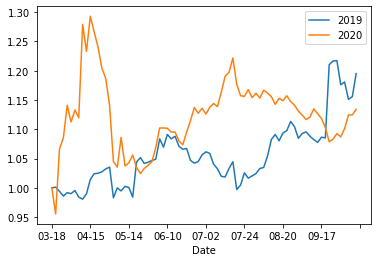

In [21]:
exdf.plot(x='Date',y=["2019","2020"] )

In [22]:
adj_close_px19 = ndf19['Adj Close_x']
moving_avg19 = adj_close_px19.rolling(window=40).mean()
print(moving_avg19[-10:])

70    1756.018720
71    1756.082709
72    1761.147324
73    1767.184540
74    1773.453940
75    1777.961334
76    1783.516565
77    1788.032568
78    1792.632199
79    1798.389121
Name: Adj Close_x, dtype: float64


In [23]:
adj_close_px20 = ndf20['Adj Close_y']
moving_avg20 = adj_close_px20.rolling(window=40).mean()
print(moving_avg20[-10:])

70    2171.357275
71    2171.732062
72    2170.944446
73    2171.082587
74    2171.993433
75    2171.603687
76    2170.947937
77    2170.334253
78    2170.199799
79    2170.124567
Name: Adj Close_y, dtype: float64


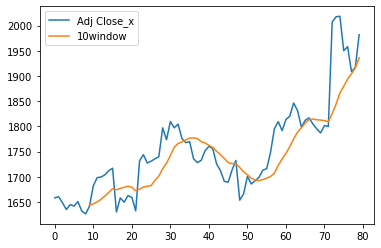

In [25]:
adj_close_px19 = ndf19['Adj Close_x']
ndf19['10window'] = adj_close_px19.rolling(window=10).mean()
ndf19[['Adj Close_x','10window']].plot()
plt.show()